# K Means - SUV Data

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
warnings.filterwarnings('ignore')

In [87]:
df = pd.read_csv('suv_data.csv')

df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [88]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [89]:
df.drop(['User ID', 'Gender','Purchased'],axis=1, inplace=True)

In [90]:
df.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


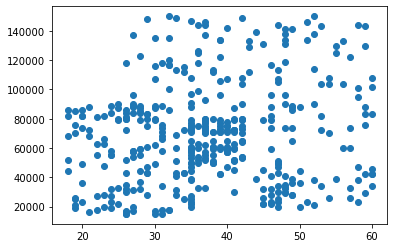

In [91]:
plt.scatter(df.Age,df.EstimatedSalary);

In [93]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','EstimatedSalary']])
y_predicted

array([1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1,

In [94]:
df['cluster'] = y_predicted

In [95]:
df.head()

,Age,EstimatedSalary,cluster
0,19,19000,1
1,35,20000,1
2,26,43000,1
3,27,57000,0
4,19,76000,0


In [96]:
# seperate the clusters into 3 dataframes
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]

No handles with labels found to put in legend.


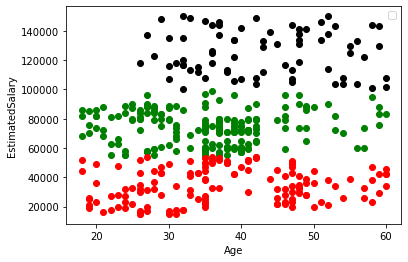

In [97]:
plt.scatter(cluster0.Age,cluster0.EstimatedSalary, color = 'green')
plt.scatter(cluster1.Age,cluster1.EstimatedSalary, color = 'red')
plt.scatter(cluster2.Age,cluster2.EstimatedSalary, color = 'black')

plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [98]:
#scaling data
scaler = MinMaxScaler()
scaler.fit(df[['EstimatedSalary']])
df['EstimatedSalary'] = scaler.transform(df[['EstimatedSalary']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Age,EstimatedSalary,cluster
0,0.023810,0.029630,1
1,0.404762,0.037037,1
2,0.190476,0.207407,1
3,0.214286,0.311111,0
4,0.023810,0.451852,0
...,...,...,...
395,0.666667,0.192593,1
396,0.785714,0.059259,1
397,0.761905,0.037037,1
398,0.428571,0.133333,1


In [99]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','EstimatedSalary']])
y_predicted

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0,

In [100]:
df['cluster'] = y_predicted

In [101]:
df.head()

,Age,EstimatedSalary,cluster
0,0.023810,0.029630,2
1,0.404762,0.037037,2
2,0.190476,0.207407,2
3,0.214286,0.311111,2
4,0.023810,0.451852,2


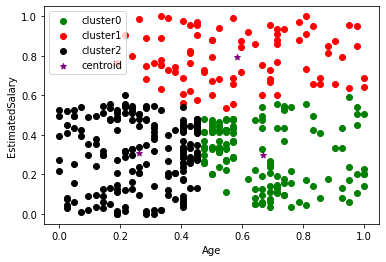

In [102]:
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]

plt.scatter(cluster0.Age,cluster0.EstimatedSalary, color = 'green',label='cluster0')
plt.scatter(cluster1.Age,cluster1.EstimatedSalary, color = 'red',label='cluster1')
plt.scatter(cluster2.Age,cluster2.EstimatedSalary, color = 'black',label='cluster2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

In [103]:
#using elbow method
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

In [104]:
sse

[363.10659586517744,
 85.0795842674628,
 20.35563515997348,
 16.318764637609615,
 13.173540602747245,
 10.211926418041445,
 8.394199758825142,
 6.950868559768867,
 6.253478490839314]

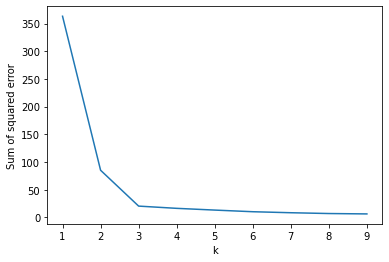

In [105]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [62]:
# using the elbow method a k of 3 would be a better option